In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
import qiskit.providers.fake_provider
from qiskit_aer import AerSimulator, Aer

import pandas as pd
from fractions import Fraction


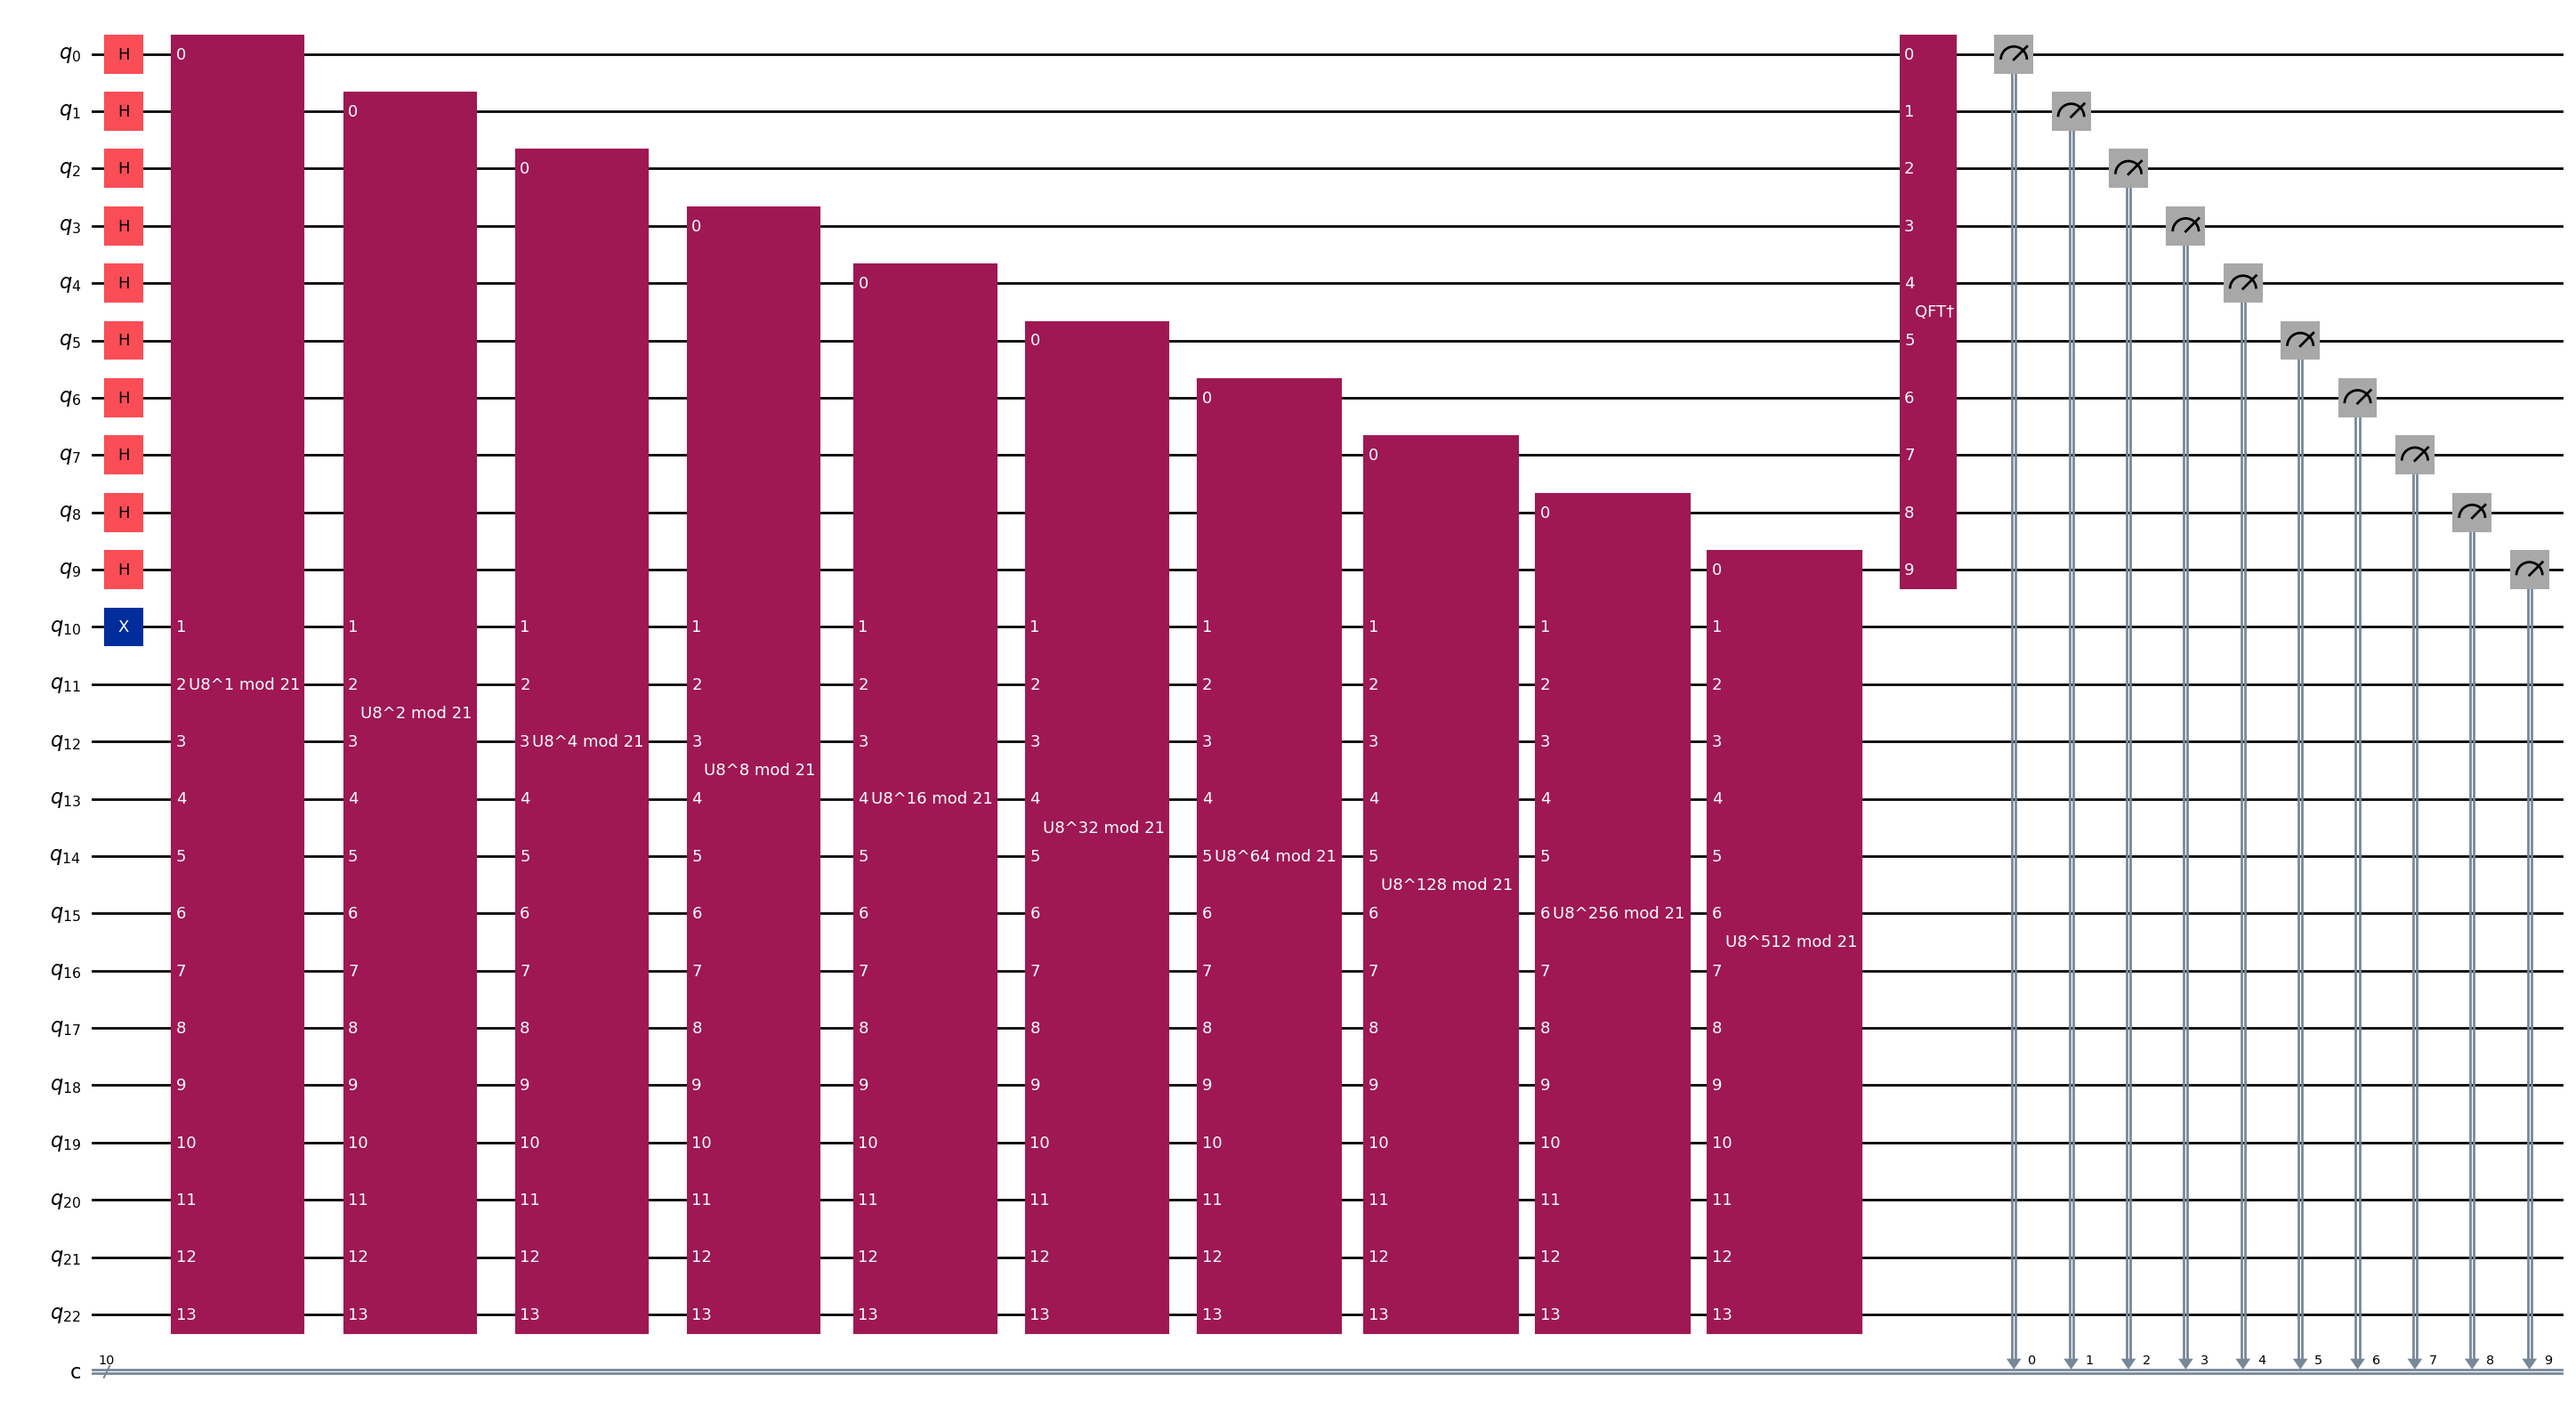

In [12]:
from shor_algo_adder_method import shor_circiut
import bit_functions

N = 21
a = 8
N_COUNT = 2*bit_functions.bit_length(N)

qc = shor_circiut(N, a)

qc.draw('mpl', fold = -1)


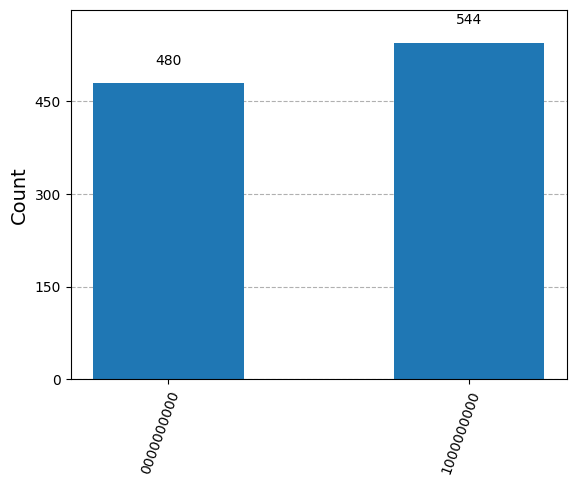

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
# counts = execute(t_qc, aer_sim).result().get_counts()
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [14]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

              Register Output            Phase
0  1000000000(bin) = 512(dec)  512/1024 = 0.50
1  0000000000(bin) =   0(dec)    0/1024 = 0.00


In [15]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)


   Phase Fraction  Guess for r
0    0.5      1/2            2
1    0.0      0/1            1


In [16]:
guesses = {x[2] for x in rows if x[2] != 1}

for curr_gess in guesses:
    if curr_gess % 2 == 0:
        num1 = int(a**(curr_gess/2)+1)
        num2 = int(a**(curr_gess/2)-1)

        q = np.gcd(num1, N)
        p = np.gcd(num2, N)

        print(f"for r = {curr_gess} factors are: {p}, {q}")


for r = 2 factors are: 7, 3
